In [4]:
import torch#loads YOLO model 
from matplotlib import pyplot as plt
import numpy as np
import cv2
import uuid #unique identifier
import os

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp4/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Gyanvi/.cache\torch\hub\master.zip
YOLOv5  2024-5-4 Python-3.9.13 torch-2.3.0+cu118 CUDA:0 (NVIDIA GeForce MX130, 2048MiB)

Fusing layers... 
Model summary: 213 layers, 7069459 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [6]:
img=os.path.join('data','images','Drowsy.c1aef96f-0841-11ef-b70d-18568082202a.jpg')

In [7]:
results=model(img)

In [8]:
results.render()

[array([[[174, 171, 178],
         [172, 169, 176],
         [174, 169, 175],
         ...,
         [183, 185, 180],
         [184, 186, 181],
         [186, 188, 183]],
 
        [[172, 169, 176],
         [171, 168, 175],
         [171, 169, 174],
         ...,
         [184, 186, 181],
         [184, 186, 181],
         [185, 187, 182]],
 
        [[169, 168, 173],
         [169, 168, 173],
         [169, 168, 173],
         ...,
         [183, 188, 182],
         [182, 187, 181],
         [182, 187, 181]],
 
        ...,
 
        [[ 77,  43,  56],
         [255, 149, 200],
         [255, 149, 200],
         ...,
         [ 96, 119,  99],
         [ 95, 118,  98],
         [ 93, 118,  97]],
 
        [[ 74,  43,  57],
         [255, 149, 200],
         [255, 149, 200],
         ...,
         [ 92, 120,  97],
         [ 92, 120,  97],
         [ 90, 120,  96]],
 
        [[ 69,  38,  52],
         [255, 149, 200],
         [255, 149, 200],
         ...,
         [ 91, 121,  97],
  

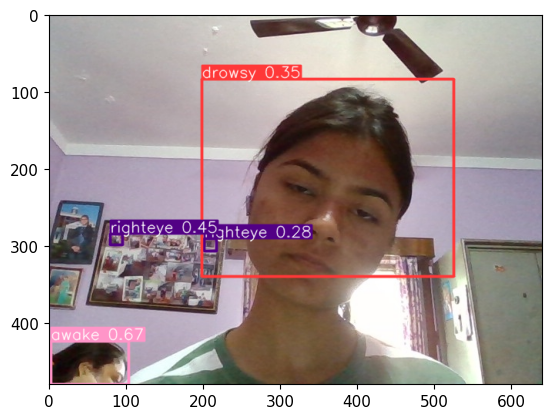

In [9]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [11]:
#real time detection
cap=cv2.VideoCapture(1)
while cap.isOpened():
    ret,frame=cap.read()
    #make detection
    #pass the frame that we capture from web cam
    results=model(frame)
    cv2.imshow('YOLO',np.squeeze((results.render())))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()